# UAC20 Audio Class Descriptors 列舉

### 需安裝

```
pip install pyusb

```

### Windows DLL
[libusb-win32-devel-filter-1.2.6.0.exe](https://sourceforge.net/projects/libusb-win32/files/libusb-win32-releases/1.2.6.0/)  

https://sourceforge.net/projects/libusb-win32/  



### Linux 權限
https://ubuntuforums.org/showthread.php?t=1682084  
https://linuxconfig.org/tutorial-on-how-to-write-basic-udev-rules-in-linux  
```
If anyone is interested.. fixed with udev rule:

cd /etc/udev/rules.d/

nano 70-ch341.rules

SUBSYSTEM=="usb", ATTRS{idVendor}=="1a86", GROUP="dialout"
SUBSYSTEM=="usb", ATTRS{idVendor}=="1a86", MODE="666"

then reloaded udev rules:

$ sudo udevadm control --reload-rules  
$ sudo udevadm trigger

```

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '..', '待處理', 'USB', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 
 
import universal_serial_bus
from universal_serial_bus import *
from universal_serial_bus.orm import ModelBuilder
from usb_audio.orm.uac20 import UACdevice

## USB Descriptors

In [3]:
from universal_serial_bus.orm.usb20.descriptors import * 

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\Universal Serial Bus\\bitbucket\\github\\spec\\usb20\\'
db_path = db_path + 'usb_2_0_descriptors.sqlite'
db_url = 'sqlite:///' + db_path  

ModelBuilder._truncate_tables(db_url) 
_, _, tables, session_usb_descriptors = map_db_objects(db_url)

## USB Codes

In [4]:
from universal_serial_bus.orm.usb20.codes import * 

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\Universal Serial Bus\\bitbucket\\github\\spec\\usb20\\'
db_path = db_path + 'usb_2_0_codes.sqlite'
db_url = 'sqlite:///' + db_path  

# ModelBuilder._truncate_tables(db_url) 
_, _, tables, session_usb_codes = map_db_objects(db_url)

## UAC Descriptors

In [5]:
from usb_audio.orm.uac20.descriptors import *
import usb_audio

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_descriptors.sqlite'
db_url = 'sqlite:///' + db_path 

ModelBuilder._truncate_tables(db_url)
_, _, tables, session_uac_descriptors = map_db_objects(db_url)

In [6]:
# ModelBuilder.gen_all(db_url, True)

## UAC Codes

In [7]:
from usb_audio.orm.uac20.codes import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_codes.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_codes = map_db_objects(db_url)

In [8]:
# ModelBuilder.gen_all(db_url, True)

## UAC Format Type Descriptors

In [9]:
from usb_audio.orm.uac20.formats.descriptors import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_data_formats_descriptors.sqlite'
db_url = 'sqlite:///' + db_path 

ModelBuilder._truncate_tables(db_url)
_, _, tables, session_uac_format_descriptors = map_db_objects(db_url)

In [10]:
# ModelBuilder.gen_all(db_url, True)

## UAC Format Types

In [11]:
from usb_audio.orm.uac20.formats.formats import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_data_formats.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_formats = map_db_objects(db_url)

In [12]:
# ModelBuilder.gen_all(db_url, True)

## UAC Terminal Types

In [13]:
from usb_audio.orm.uac20.terminals import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_terminal_types.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_terminal_types = map_db_objects(db_url)

In [14]:
# ModelBuilder.gen_all(db_url, True)

## Devices

In [15]:
devices, devices_ids = find_all_devices_by_class(DEVICE_CLASS.Audio)
devices_ids

[(1204, 1018)]

## Device

In [16]:
# idVendor = 0x1b3f
# idProduct = 0x2008

idVendor, idProduct = devices_ids[0]

usb_device = UACdevice(vid = idVendor, pid = idProduct)
usb_device.id = 1
# print(dev)

In [17]:
# from pprint import pprint

# for dbo in usb_device.descriptors_dbos:
#     print(dbo.__class__.__name__)
#     for k, v in dbo.attributes.items():
#         print('\t{}: 0x{}'.format(k, v))

## Device descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#DeviceDescriptors  

In [18]:
bmRequestType = usb.util.build_request_type(CONTROL_REQUEST.DIRECTION.IN, 
                                            CONTROL_REQUEST.TYPE.STANDARD, 
                                            CONTROL_REQUEST.RECIPIENT.DEVICE)

In [19]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.DEVICE << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = DESCRIPTOR.SIZE.DEVICE)
descriptor

array('B', [18, 1, 0, 2, 239, 2, 1, 64, 180, 4, 250, 3, 16, 0, 1, 2, 3, 1])

In [20]:
dev_dscrpt = StandardDeviceDescriptor.from_byte_array(descriptor, parent_id = usb_device.id)
session_usb_descriptors.add(dev_dscrpt)
session_usb_descriptors.commit()
dev_dscrpt.id

1

## Configuration descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#ConfigurationDescriptors  

In [21]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = DESCRIPTOR.SIZE.CONFIG)
descriptor

array('B', [9, 2, 152, 0, 2, 1, 4, 128, 50])

In [22]:
# config = StandardConfigurationDescriptor(*(StandardConfigurationDescriptor.get_descriptor_fields_values(descriptor)))
config_dscrpt = StandardConfigurationDescriptor.from_byte_array(descriptor, parent_id = dev_dscrpt.id)
session_usb_descriptors.add(config_dscrpt)
session_usb_descriptors.commit()
config_dscrpt.id

1

### Host 再一次發送 GetDescriptor(Config類) 的請求
完整的長度 = wTotalLength

In [23]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = descriptor[2])
descriptor

array('B', [9, 2, 152, 0, 2, 1, 4, 128, 50, 8, 11, 0, 2, 1, 0, 32, 6, 9, 4, 0, 0, 1, 1, 1, 32, 7, 9, 36, 1, 0, 2, 1, 71, 0, 0, 8, 36, 10, 16, 5, 3, 0, 8, 17, 36, 2, 1, 1, 1, 0, 16, 2, 0, 0, 0, 0, 14, 0, 0, 9, 18, 36, 6, 2, 1, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 12, 36, 3, 3, 1, 3, 0, 2, 16, 0, 0, 11, 7, 5, 129, 3, 6, 0, 1, 9, 4, 1, 0, 0, 1, 2, 32, 12, 9, 4, 1, 1, 1, 1, 2, 32, 13, 16, 36, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 16, 6, 36, 2, 1, 4, 24, 7, 5, 2, 13, 0, 28, 1, 8, 37, 1, 0, 0, 0, 0, 0])

In [24]:
OrmClassBase.concate_byte_arrays(usb_device.descriptors_dbos)

array('B', [18, 1, 0, 2, 239, 2, 1, 64, 180, 4, 250, 3, 16, 0, 1, 2, 3, 1, 9, 2, 152, 0, 2, 1, 4, 128, 50, 8, 11, 0, 2, 1, 0, 32, 6, 9, 4, 0, 0, 1, 1, 1, 32, 7, 9, 36, 1, 0, 2, 1, 71, 0, 0, 8, 36, 10, 16, 5, 3, 0, 8, 17, 36, 2, 1, 1, 1, 0, 16, 2, 0, 0, 0, 0, 14, 0, 0, 9, 18, 36, 6, 2, 1, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 12, 36, 3, 3, 1, 3, 0, 2, 16, 0, 0, 11, 7, 5, 129, 3, 6, 0, 1, 9, 4, 1, 0, 0, 1, 2, 32, 12, 9, 4, 1, 1, 1, 1, 2, 32, 13, 16, 36, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 16, 6, 36, 2, 1, 4, 24, 7, 5, 2, 13, 0, 28, 1, 8, 37, 1, 0, 0, 0, 0, 0])

## 所有的 descriptors

In [25]:
descriptors = usb_device.descriptors_from_config
descriptors

[array('B', [9, 2, 152, 0, 2, 1, 4, 128, 50]),
 array('B', [8, 11, 0, 2, 1, 0, 32, 6]),
 array('B', [9, 4, 0, 0, 1, 1, 1, 32, 7]),
 array('B', [9, 36, 1, 0, 2, 1, 71, 0, 0]),
 array('B', [8, 36, 10, 16, 5, 3, 0, 8]),
 array('B', [17, 36, 2, 1, 1, 1, 0, 16, 2, 0, 0, 0, 0, 14, 0, 0, 9]),
 array('B', [18, 36, 6, 2, 1, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10]),
 array('B', [12, 36, 3, 3, 1, 3, 0, 2, 16, 0, 0, 11]),
 array('B', [7, 5, 129, 3, 6, 0, 1]),
 array('B', [9, 4, 1, 0, 0, 1, 2, 32, 12]),
 array('B', [9, 4, 1, 1, 1, 1, 2, 32, 13]),
 array('B', [16, 36, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 16]),
 array('B', [6, 36, 2, 1, 4, 24]),
 array('B', [7, 5, 2, 13, 0, 28, 1]),
 array('B', [8, 37, 1, 0, 0, 0, 0, 0])]

In [26]:
usb_device.descriptors_dbos

In [27]:
usb_device.descriptors_dbos_and_attributes 

[{'StandardDeviceDescriptor': {'parent_id': None,
   'bLength': '12',
   'bDescriptorType': '01',
   'bcdUSB': '0002',
   'bDeviceClass': 'ef',
   'bDeviceSubClass': '02',
   'bDeviceProtocol': '01',
   'bMaxPacketSize0': '40',
   'idVendor': 'b404',
   'idProduct': 'fa03',
   'bcdDevice': '1000',
   'iManufacturer': '01',
   'iProduct': '02',
   'iSerialNumber': '03',
   'bNumConfigurations': '01'}},
 {'StandardConfigurationDescriptor': {'parent_id': None,
   'bLength': '09',
   'bDescriptorType': '02',
   'wTotalLength': '9800',
   'bNumInterfaces': '02',
   'bConfigurationValue': '01',
   'iConfiguration': '04',
   'bmAttributes': '80',
   'bMaxPower': '32'}},
 {'StandardInterfaceAssociationDescriptor': {'parent_id': None,
   'bLength': '08',
   'bDescriptorType': '0b',
   'bFirstInterface': '00',
   'bInterfaceCount': '02',
   'bFunctionClass': '01',
   'bFunctionSubClass': '00',
   'bFunctionProtocol': '20',
   'iFunction': '06'}},
 {'StandardAcInterfaceDescriptor': {'parent_id': 

## 判斷 descriptors 的種類，並儲存到 db

In [28]:
def is_a(descpt, i, code):
    return OrmClassBase.int_eq_hex(descpt[i], code)

 
def get_descriptor_class(dscrpt, intf_type = None): 
    _class = None
    session = None
         
    if is_a(dscrpt, 1, '02'):  # 如果是 config
        _class = StandardConfigurationDescriptor  
        session = session_usb_descriptors    
     
    if is_a(dscrpt, 1, '05'):  # 如果是 endpoint
        if intf_type == "HID":
            _class = StandardEndpointDescriptor
            session = session_usb_descriptors 
        
        if intf_type == "AS":
            _class = StandardAsIsochronousAudioDataEndpointDescriptor
            session = session_uac_descriptors

    if is_a(dscrpt, 1, '04'):  # 如果是 interface
        
        _class = StandardInterfaceDescriptor      
        session = session_usb_descriptors    
        
        if is_a(dscrpt, 5, '03'):  # 如果是 HID
            intf_type =  "HID" 
                
        if is_a(dscrpt, 5, '01'):  # 如果是 audio
            if is_a(dscrpt, 6, '01'):  # 如果是 AC interface
                intf_type =  "AC" 
            if is_a(dscrpt, 6, '02'):  # 如果是 AC interface
                intf_type =  "AS" 
                        
    if is_a(dscrpt, 1, '24'):  # 如果是 CS_INTERFACE
        session = session_uac_descriptors
        if intf_type == "AC":             
            _classes = {'00': None,
                        '01': ClassSpecificAcInterfaceHeaderDescriptor,
                        '02': InputTerminalDescriptor,
                        '03': OutputTerminalDescriptor,
                        '04': MixerUnitDescriptor,
                        '05': SelectorUnitDescriptor,
                        '06': FeatureUnitDescriptor,
                        '07': 'EFFECT_UNIT',
                        '08': 'PROCESSING_UNIT',
                        '09': ExtensionUnitDescriptor,
                        '0A': ClockSourceDescriptor,
                        '0B': ClockSelectorDescriptor,
                        '0C': ClockMultiplierDescriptor,
                        '0D': SamplingRateConverterUnitDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2]).upper()
            _class = _classes[code]            
            
        if intf_type == "AS":
             
            _classes = {'00': None,
                        '01': ClassSpecificAsInterfaceDescriptor,
                        '02': TypeIFormatTypeDescriptor,
                        '03': EncoderDescriptor,
                        '04': 'DECODER'}
            
            code = OrmClassBase.int_to_hex(dscrpt[2]).upper()
            _class = _classes[code]            
            if code == '02': session = session_uac_format_descriptors

                        
    if is_a(dscrpt, 1, '25'):  # 如果是 CS_ENDPOINT
        session = session_uac_descriptors
        if intf_type == "AC":  
            pass    
            
        if intf_type == "AS":             
            _classes = {'00': None,
                        '01': ClassSpecificAsIsochronousAudioDataEndpointDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2]).upper()
            _class = _classes[code]
            if code == '02': session = session_uac_format_descriptors
                
    return _class, session, intf_type 

In [29]:
intf_type = None
i = 0

dbos = []

for descriptor in descriptors:
    _class, session, intf_type = get_descriptor_class(descriptor, intf_type)
    
    print()
    print(i)
    i+=1    
    
    print(_class, intf_type)
    print(descriptor)

    
    if _class is not None:
        dbo = _class.from_byte_array(descriptor)
        dbos.append(dbo)
        print(dbo.byte_array)
        session.add(dbo)
        session.commit()


0
<class 'universal_serial_bus.orm.usb20.descriptors.StandardConfigurationDescriptor'> None
array('B', [9, 2, 152, 0, 2, 1, 4, 128, 50])
array('B', [9, 2, 152, 0, 2, 1, 4, 128, 50])

1
None None
array('B', [8, 11, 0, 2, 1, 0, 32, 6])

2
<class 'universal_serial_bus.orm.usb20.descriptors.StandardInterfaceDescriptor'> AC
array('B', [9, 4, 0, 0, 1, 1, 1, 32, 7])
array('B', [9, 4, 0, 0, 1, 1, 1, 32, 7])

3
<class 'usb_audio.orm.uac20.descriptors.ClassSpecificAcInterfaceHeaderDescriptor'> AC
array('B', [9, 36, 1, 0, 2, 1, 71, 0, 0])
array('B', [9, 36, 1, 0, 2, 1, 71, 0, 0])

4
<class 'usb_audio.orm.uac20.descriptors.ClockSourceDescriptor'> AC
array('B', [8, 36, 10, 16, 5, 3, 0, 8])
array('B', [8, 36, 10, 16, 5, 3, 0, 8])

5
<class 'usb_audio.orm.uac20.descriptors.InputTerminalDescriptor'> AC
array('B', [17, 36, 2, 1, 1, 1, 0, 16, 2, 0, 0, 0, 0, 14, 0, 0, 9])
array('B', [17, 36, 2, 1, 1, 1, 0, 16, 2, 0, 0, 0, 0, 14, 0, 0, 9])

6
<class 'usb_audio.orm.uac20.descriptors.FeatureUnitDescriptor'

C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


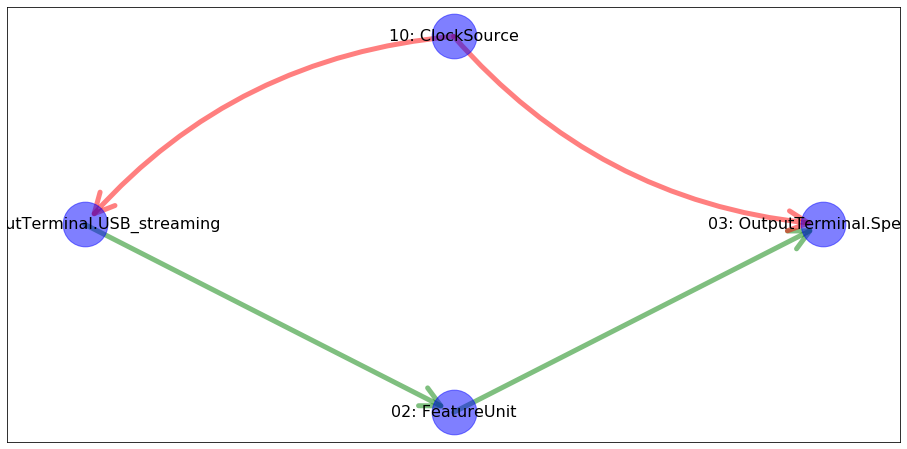

In [30]:
plt.figure(figsize = (16, 8))

usb_device.draw_topolograph()

## 各種 codes

In [31]:
descriptor_types = DescriptorType.to_dict(['bDescriptorType'], ['dscrpt_type'], session_usb_codes)
descriptor_types

{('01',): ('device',),
 ('02',): ('configuration',),
 ('03',): ('string',),
 ('04',): ('interface',),
 ('05',): ('endpoint',),
 ('06',): ('device_qualifier',),
 ('07',): ('other_speed_configuration',),
 ('08',): ('interface_power',),
 ('09',): ('OTG',),
 ('0a',): ('debug',),
 ('0b',): ('interface_association',)}

In [32]:
class_codes = ClassCode.to_dict(['base_code'], ['description'], session_usb_codes)
class_codes

{('00',): ('Use class information in the Interface Descriptors',),
 ('01',): ('Audio',),
 ('02',): ('Communications and CDC Control',),
 ('03',): ('HID (Human Interface Device)',),
 ('05',): ('Physical',),
 ('06',): ('Image',),
 ('07',): ('Printer',),
 ('08',): ('Mass Storage',),
 ('09',): ('Hub',),
 ('0a',): ('CDC-Data',),
 ('0b',): ('Smart Card',),
 ('0d',): ('Content Security',),
 ('0e',): ('Video',),
 ('0f',): ('Personal Healthcare',),
 ('10',): ('Audio/Video Devices',),
 ('11',): ('Billboard Device Class',),
 ('12',): ('USB Type-C Bridge Class',),
 ('dc',): ('Diagnostic Device',),
 ('e0',): ('Wireless Controller',),
 ('ef',): ('Miscellaneous',),
 ('fe',): ('Application Specific',),
 ('ff',): ('Vendor Specific',)}

In [33]:
uac_subclasses = AudioInterfaceSubclassCode.to_dict(['value'], ['audio_interface_subclass_code'], session_uac_codes)
uac_subclasses

{('00',): ('INTERFACE_SUBCLASS_UNDEFINED',),
 ('01',): ('AUDIOCONTROL',),
 ('02',): ('AUDIOSTREAMING',),
 ('03',): ('MIDISTREAMING',)}

In [34]:
ac_descriptor_types = AudioClassSpecificDescriptorType.to_dict(['value'], ['descriptor_type'], session_uac_codes)
ac_descriptor_types

{('20',): ('CS_UNDEFINED',),
 ('21',): ('CS_DEVICE',),
 ('22',): ('CS_CONFIGURATION',),
 ('23',): ('CS_STRING',),
 ('24',): ('CS_INTERFACE',),
 ('25',): ('CS_ENDPOINT',)}

In [35]:
ac_descriptor_subtypes = AudioClassSpecificAcInterfaceDescriptorSubtype.to_dict(['value'], ['descriptor_subtype'], session_uac_codes)
ac_descriptor_subtypes

{('00',): ('AC_DESCRIPTOR_UNDEFINED',),
 ('01',): ('HEADER',),
 ('02',): ('INPUT_TERMINAL',),
 ('03',): ('OUTPUT_TERMINAL',),
 ('04',): ('MIXER_UNIT',),
 ('05',): ('SELECTOR_UNIT',),
 ('06',): ('FEATURE_UNIT',),
 ('07',): ('EFFECT_UNIT',),
 ('08',): ('PROCESSING_UNIT',),
 ('09',): ('EXTENSION_UNIT',),
 ('0A',): ('CLOCK_SOURCE',),
 ('0B',): ('CLOCK_SELECTOR',),
 ('0C',): ('CLOCK_MULTIPLIER',),
 ('0D',): ('SAMPLE_RATE_CONVERTER',)}

In [36]:
as_descriptor_subtypes = \
    AudioClassSpecificAsInterfaceDescriptorSubtype.to_dict(['value'], ['descriptor_subtype'], session_uac_codes)
as_descriptor_subtypes

{('00',): ('AS_DESCRIPTOR_UNDEFINED',),
 ('01',): ('AS_GENERAL',),
 ('02',): ('FORMAT_TYPE',),
 ('03',): ('ENCODER',),
 ('04',): ('DECODER',)}

In [37]:
ep_descriptor_subtypes = \
    AudioClassSpecificEndpointDescriptorSubtype.to_dict(['value'], ['descriptor_subtype'], session_uac_codes)
ep_descriptor_subtypes

{('00',): ('DESCRIPTOR_UNDEFINED',), ('01',): ('EP_GENERAL',)}

## String descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#StringDescriptors  

In [38]:
string_descriptors = usb_device.get_strings()
string_descriptors

['',
 'Wei Lin',
 'UAC2.0 Sound Card Prototype',
 '0.1',
 'High speed configuration',
 'Full speed configuration',
 'UAC2.0 Sound Card Prototype',
 'Audio Control Interface',
 'Clock Source',
 'USB Streaming into device',
 "['Mute', 'Volume']",
 'Speaker',
 'Audio Streaming Disabled (zero bandwidth)',
 'Audio Streaming Enabled',
 'Front Left',
 'Front Right',
 'Front Left',
 'Front Right',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [39]:
for i in range(len(string_descriptors)): 
        if string_descriptors[i] is not None:
            string = UnicodeStringDescriptor(len(string_descriptors[i]),
                                             UnicodeStringDescriptor.int_to_hex(3), 
                                             string_descriptors[i], parent_id = usb_device.id)   
            session_usb_descriptors.add(string)
        
session_usb_descriptors.commit() 